<a href="https://colab.research.google.com/github/Ramachetan/Wine-Quality-Prediction-Spark-ML-Model/blob/main/WIneQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality Prediction**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

# **Load Data**

In [ ]:
df_1 = pd.read_csv("TrainingDataset.csv", sep = ";")
df_2 = pd.read_csv("ValidationDataset.csv", sep = ";")

In [ ]:
df_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.9968,3.39,0.53,9.4,6
1,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.9982,3.52,0.65,9.7,5
2,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
3,8.5,0.49,0.11,2.3,0.084,9.0,67.0,0.9968,3.17,0.53,9.4,5
4,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.9968,3.43,0.63,9.7,6


In [ ]:
df_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


# **Data Preparation**

## **Data Seperation as X and y**

In [ ]:
y = df_1['quality']
y

0       6
1       5
2       5
3       5
4       6
       ..
1274    5
1275    6
1276    6
1277    5
1278    6
Name: quality, Length: 1279, dtype: int64

In [ ]:
X = df_1.drop('quality', axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4
1,7.6,0.390,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.7
2,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5
3,8.5,0.490,0.11,2.3,0.084,9.0,67.0,0.99680,3.17,0.53,9.4
4,6.9,0.400,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7
...,...,...,...,...,...,...,...,...,...,...,...
1274,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1275,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1276,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1277,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.7
109,7.5,0.60,0.03,1.8,0.095,25.0,99.0,0.99500,3.35,0.54,10.1
193,7.2,0.63,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0
84,8.1,1.33,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9
964,7.0,0.42,0.19,2.3,0.071,18.0,36.0,0.99476,3.39,0.56,10.9
...,...,...,...,...,...,...,...,...,...,...,...
145,7.9,0.50,0.33,2.0,0.084,15.0,143.0,0.99680,3.20,0.55,9.5
984,7.6,0.79,0.21,2.3,0.087,21.0,68.0,0.99550,3.12,0.44,9.2
390,10.3,0.50,0.42,2.0,0.069,21.0,51.0,0.99820,3.16,0.72,11.5
1147,6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0


In [ ]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
624,8.3,0.300,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.1
377,10.4,0.330,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2
1059,7.5,0.570,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8
98,8.3,0.715,0.15,1.8,0.089,10.0,52.0,0.99680,3.23,0.77,9.5
543,5.8,1.010,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5
...,...,...,...,...,...,...,...,...,...,...,...
674,10.0,0.350,0.45,2.5,0.092,20.0,88.0,0.99918,3.15,0.43,9.4
511,7.2,1.000,0.00,3.0,0.102,7.0,16.0,0.99586,3.43,0.46,10.0
688,8.9,0.350,0.40,3.6,0.110,12.0,24.0,0.99549,3.23,0.70,12.0
654,8.8,0.330,0.41,5.9,0.073,7.0,13.0,0.99658,3.30,0.62,12.1


# **Model Building**

## **Linear Regression**

### **Training the Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### **Applying the model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
y_lr_train_pred

array([5.3314755 , 5.24907799, 5.0499894 , ..., 6.1771336 , 5.08846569,
       6.17524012])

In [ ]:
y_lr_test_pred

array([6.39417136, 6.13835397, 5.76740961, 5.32929381, 4.80509918,
       4.85743731, 5.32257266, 5.38921615, 5.62893952, 5.39596662,
       5.7283172 , 5.55494254, 6.11155556, 5.74567808, 5.25146906,
       6.37537717, 6.33999777, 5.72539041, 5.80241177, 5.04657288,
       5.3427974 , 6.29409749, 5.34699136, 5.36203651, 6.01616353,
       5.26044562, 5.53309785, 5.63823101, 6.13616533, 6.34741592,
       4.94922868, 5.090187  , 5.03060374, 6.07261751, 5.29499826,
       6.22022842, 5.46844694, 6.19644769, 5.68807688, 6.38410894,
       5.07001659, 6.14506753, 5.77708455, 5.55317612, 5.21707348,
       5.97973158, 6.05024123, 6.62238339, 4.9665326 , 5.53248183,
       5.87334812, 6.23539021, 5.33433374, 5.85284797, 6.21852283,
       5.06886616, 5.61301914, 6.08542282, 6.52374231, 6.48745497,
       6.76757909, 5.01991007, 5.75416115, 6.4386382 , 6.07123226,
       5.68837699, 6.04368482, 5.91775788, 5.17551712, 5.55061018,
       6.03364794, 5.21380068, 6.639682  , 4.94078378, 5.03934

### **Evaluate model Performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.430622,0.365774,0.352655,0.368674


## **Random Forest**

### Training the Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(max_depth=2, random_state = 100)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate model Performance**

In [ ]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.456084,0.328273,0.369613,0.338315


## Model Comparison

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis = 0).reset_index(drop = True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.430622,0.365774,0.352655,0.368674
1,Random Forest,0.456084,0.328273,0.369613,0.338315


## Data Visualization

Text(0.5, 0, 'Experimental Quality')

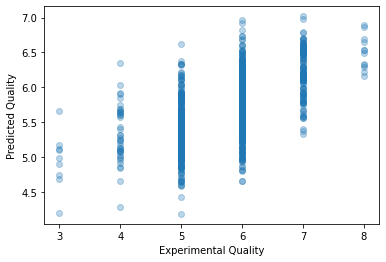

In [ ]:
plt.scatter(x = y_train, y = y_lr_train_pred, alpha = 0.3)
plt.ylabel('Predicted Quality')
plt.xlabel('Experimental Quality')